In [1]:
import keras
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from keras.applications.imagenet_utils import decode_predictions

import matplotlib.pyplot as plt

## Load Pre-trained Model

In [2]:
vgg_model = vgg16.VGG16(weights='imagenet')

## Load Image

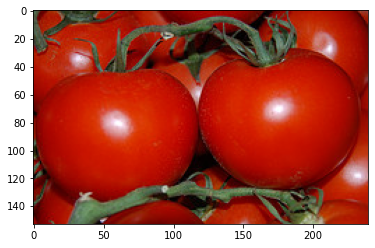

Original image size:  (240, 153)


In [3]:
image_path = './datasets/validation/tomato/0c9b6047cd6671a2b7f2f8366a73c0c85ec3ce40.jpg' # tomato, cat, dog, horse, duck, bfly, corn, grape
original_image = load_img(image_path)
plt.imshow(original_image)
plt.show()
print('Original image size: ', original_image.size)

resized_image = load_img(image_path, target_size=(224, 224))

In [4]:
# convert the image to a numpy array
numpy_image = img_to_array(resized_image)
print('Numpy image size: ', numpy_image.shape)

# convert the image into batch format
batch_image = np.expand_dims(numpy_image, axis=0)
print('Batch image size: ', batch_image.shape)

Numpy image size:  (224, 224, 3)
Batch image size:  (1, 224, 224, 3)


Once we have the image in the right format, we can feed it to the network and get the predictions.

## Predict the Image

In [5]:
# prepare the image for the VGG model
vgg_processed_image = vgg16.preprocess_input(batch_image.copy())

# get the predicted probabilities for each class
vgg_predictions = vgg_model.predict(vgg_processed_image)

# we will get top 5 predictions which is the default
predictions_list = {'vgg_predictions': vgg_predictions}

In [6]:
for key, value in predictions_list.items():
    predicted_label = decode_predictions(value)
    print('Prediction: ', key)
    print(predicted_label)
    print('---')

Prediction:  vgg_predictions
[[('n07720875', 'bell_pepper', 0.5125797), ('n12620546', 'hip', 0.27051833), ('n07718472', 'cucumber', 0.08637887), ('n03461385', 'grocery_store', 0.032033723), ('n07716358', 'zucchini', 0.01787699)]]
---


<hr/>